Iteration 1: Best Cost = 2.5095812398438917
Iteration 2: Best Cost = 1.7376452027597205
Iteration 3: Best Cost = 0.7551078762105856
Iteration 4: Best Cost = 0.6053566519285835
Iteration 5: Best Cost = 0.1440622081330569
Iteration 6: Best Cost = 0.08250964859982769
Iteration 7: Best Cost = 0.02817606935050878
Iteration 8: Best Cost = 0.01807797422512985
Iteration 9: Best Cost = 0.01613355212453833
Iteration 10: Best Cost = 0.008752587527400766
Iteration 11: Best Cost = 0.006645775529474389
Iteration 12: Best Cost = 0.004687314183783382
Iteration 13: Best Cost = 0.0018194383221635162
Iteration 14: Best Cost = 0.0013847681703112928
Iteration 15: Best Cost = 0.0012183984313049625
Iteration 16: Best Cost = 0.0009559728250722326
Iteration 17: Best Cost = 0.000741907768734568
Iteration 18: Best Cost = 0.0005528060388612738
Iteration 19: Best Cost = 0.0005121605648829507
Iteration 1: Best Cost = 11.461459235292477
Iteration 2: Best Cost = 2.8984372534637726
Iteration 3: Best Cost = 1.090907197

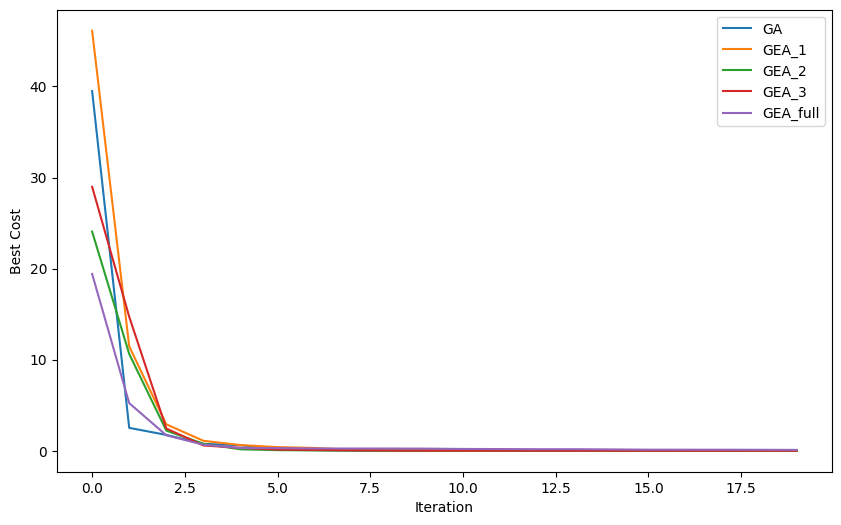

In [2]:
import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt

global NFE
NFE = 0

def sphere(x):
    global NFE
    if pd.isna(NFE):
        NFE = 0
    NFE += 1
    return sum(item**2 for item in x)

def pop_sort(p, c):
    li = [[c[i], i] for i in range(len(c))]
    li.sort()
    sorted_index = [x[1] for x in li]
    sorted_pop = [p[i] for i in sorted_index]
    sorted_cost = [c[i] for i in sorted_index]
    return sorted_pop, sorted_cost

def CrossOver(x1, x2, gamma, varMin, varMax):
    alpha = np.random.uniform(-gamma, 1+gamma, size=len(x1))
    y1 = np.clip(alpha * np.array(x1) + (1 - alpha) * np.array(x2), varMin, varMax)
    y2 = np.clip(alpha * np.array(x2) + (1 - alpha) * np.array(x1), varMin, varMax)
    return y1.tolist(), y2.tolist()

def mutation(x, varMax, varMin):
    j = np.random.randint(len(x))
    x_mutated = x[:]
    x_mutated[j] += np.random.uniform(-0.1, 0.1)
    x_mutated[j] = np.clip(x_mutated[j], varMin, varMax)
    return x_mutated

def roulette_wheel_selection(costs, beta):
    costs = np.array(costs)
    worst_cost = np.max(costs)
    scaled_fitness = np.exp(-beta * (costs - worst_cost) / worst_cost)
    probabilities = scaled_fitness / np.sum(scaled_fitness)
    return np.random.choice(len(costs), p=probabilities)

def tournament_selection(costs, k=3):
    selected = np.random.choice(len(costs), k, replace=False)
    return selected[np.argmin([costs[i] for i in selected])]

def run_ga(scenario=None):
    nVar, varMin, varMax = 5, -10, 10
    maxIt, nPop = 20, 100
    pc, pm = 0.8, 0.3
    nc, nm = 2 * round(pc * nPop / 2), round(pm * nPop)
    gamma, beta, tournomentSize = 0.05, 8, 3
    pop = [list(np.random.uniform(varMin, varMax, size=nVar)) for _ in range(nPop)]
    costs = [sphere(ind) for ind in pop]
    pop, costs = pop_sort(pop, costs)
    bestCosts, worstCost = [costs[0]], costs[-1]
    for it in range(1, maxIt):
        popc, popc_cost = [], []
        for _ in range(nc // 2):
            p1 = pop[roulette_wheel_selection(costs, beta)]
            p2 = pop[roulette_wheel_selection(costs, beta)]
            y1, y2 = CrossOver(p1, p2, gamma, varMin, varMax)
            popc.extend([y1, y2])
            popc_cost.extend([sphere(y1), sphere(y2)])
        popm, popm_cost = [], []
        for _ in range(nm):
            p = pop[np.random.randint(nPop)]
            popm.append(mutation(p, varMax, varMin))
            popm_cost.append(sphere(popm[-1]))
        pop += popc + popm
        costs += popc_cost + popm_cost
        pop, costs = pop_sort(pop, costs)
        pop, costs = pop[:nPop], costs[:nPop]
        bestCosts.append(costs[0])
        worstCost = max(worstCost, costs[-1])
        print(f'Iteration {it}: Best Cost = {bestCosts[-1]}')
    return bestCosts

algorithms = ['GA', 'GEA_1', 'GEA_2', 'GEA_3', 'GEA_full']
results = {alg: run_ga(alg if alg != 'GA' else None) for alg in algorithms}
plt.figure(figsize=(10, 6))
for alg in algorithms:
    plt.plot(results[alg], label=alg)
plt.xlabel('Iteration')
plt.ylabel('Best Cost')
plt.legend()
plt.show()

